[[1.38068934 1.09889332 1.61963481 0.30223286 0.49549228 0.3022658
  0.68947316]
 [1.80595565 1.43736359 2.11849874 0.39532364 0.64810892 0.39536673
  0.90183788]
 [3.26009976 2.5947197  3.82430058 0.71363575 1.16996215 0.71371354
  1.62799207]
 [1.93924922 1.5434522  2.27486042 0.4245016  0.6959444  0.42454787
  0.96840053]]


C:\Users\Fatbu\AppData\Local\Temp\ipykernel_28652\433959181.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10")  # distinct colors


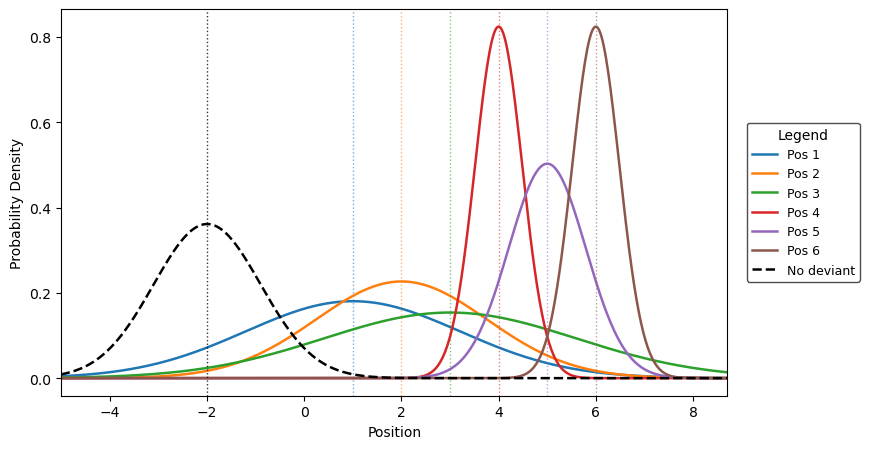

In [1]:
import numpy as np
import matplotlib.pyplot as plt

means = np.array([1, 2, 3, 4, 5, 6, -2])

pos_sigma_ = np.asarray([0.5191404, 0.2908611, 0.6787582, -1.0, -0.505646, -0.999891, -0.175270])
pos_sigma_ -= pos_sigma_.mean()

freq_sigma_ = np.asarray([ -0.499305, -0.230798, 0.3598699, -0.159587 ])
freq_sigma_ -= freq_sigma_.mean()

def sigma_matrix(pos_sigma, freq_sigma):
    pos_sigma = np.asarray(pos_sigma)
    freq_sigma = np.asarray(freq_sigma)
    
    # Broadcast: (4,1) + (1,7) → (4,7)
    mat = np.exp(freq_sigma[:, None] + pos_sigma[None, :])
    return mat

sigma_matrix_ = sigma_matrix(pos_sigma_, freq_sigma_)

print(sigma_matrix_)

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def plot_normals_by_position_averaged(means, sigmas_by_freq,
                                      span=4.0, n_points=1200,
                                      xlim=(-10, 15),
                                      title=None,
                                      use_variance_avg=True,
                                      savepath=None):
    """
    means:           shape (7,)
    sigmas_by_freq:  shape (F, 7) — σ for each (freq, position)
    """
    means = np.asarray(means, float)
    S     = np.asarray(sigmas_by_freq, float)  # (F, 7)
    assert S.ndim == 2 and S.shape[1] == len(means), "sigmas_by_freq must be (F, 7)"

    # collapse frequencies → one sigma per position
    sigmas_pos = np.sqrt(np.mean(S**2, axis=0)) if use_variance_avg else np.mean(S, axis=0)

    # x-range
    x_min = means.min() - span * sigmas_pos.max()
    x_max = means.max() + span * sigmas_pos.max()
    x = np.linspace(x_min, x_max, n_points)

    fig, ax = plt.subplots(figsize=(8.8, 4.6))
    cmap = plt.cm.get_cmap("tab10")  # distinct colors
    names = [f"Pos {k}" for k in range(1, 7)] + ["No deviant"]

    for k, (mu, s) in enumerate(zip(means, sigmas_pos)):
        if s <= 0:
            raise ValueError(f"sigma must be > 0 at position {k} (got {s})")
        y = np.exp(-0.5*((x - mu)/s)**2) / (s * np.sqrt(2*np.pi))

        if k == 6:
            # No deviant: black dashed
            ax.plot(x, y, label=names[k], linewidth=1.8, color='black', linestyle='--')
            ax.axvline(mu, color='black', linestyle=':', linewidth=1.0, alpha=0.8)
        else:
            color = cmap(k)
            ax.plot(x, y, label=names[k], linewidth=1.8, color=color)
            ax.axvline(mu, color=color, linestyle=':', linewidth=1.0, alpha=0.6)

    ax.set_xlabel("Position")
    ax.set_ylabel("Probability Density")
    ax.set_title(title)
    if xlim is not None:
        ax.set_xlim(*xlim)

    # Legend outside, boxed, titled "Legend"
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    leg = ax.legend(by_label.values(), by_label.keys(),
                    title='Legend',
                    loc='center left', bbox_to_anchor=(1.02, 0.5),
                    frameon=True, fancybox=True, framealpha=1.0,
                    edgecolor='0.3', fontsize=9, title_fontsize=10)
    leg.get_frame().set_linewidth(1.0)

    plt.tight_layout()
    if savepath:
        fig.savefig(savepath, format=savepath.split('.')[-1], bbox_inches='tight')
    plt.show()

# Labels like 4/8/16/32 kHz:
freq_labels = [f"{f} kHz" for f in [4, 8, 16, 32]]

plot_normals_by_position_averaged(means, sigma_matrix_,  xlim=(-5, 8.7), savepath="Change_Point_sensory_noise.svg"
)


C:\Users\Fatbu\AppData\Local\Temp\ipykernel_28652\433959181.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10")  # distinct colors


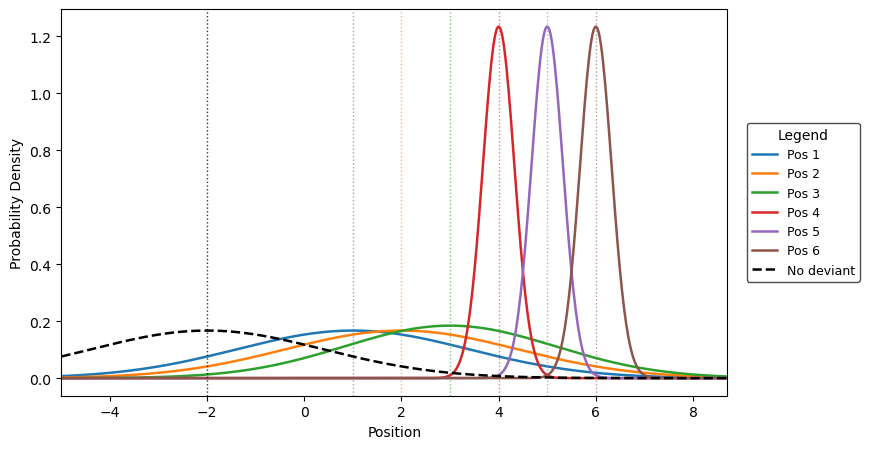

In [2]:
pos_sigma_ = np.asarray([1.0, 1.0, 0.9013229, -1.0, -1.0, -1.0, 1.0 ])
pos_sigma_ -= pos_sigma_.mean()

freq_sigma_ = np.asarray([-1.0, -1.0, -1.0, -1.0])
freq_sigma_ -= freq_sigma_.mean()

sigma_matrix_ = sigma_matrix(pos_sigma_, freq_sigma_)

plot_normals_by_position_averaged(means, sigma_matrix_,  xlim=(-5, 8.7), savepath='Omniscient_sensory_noise.svg'
)

C:\Users\Fatbu\AppData\Local\Temp\ipykernel_28652\433959181.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10")  # distinct colors


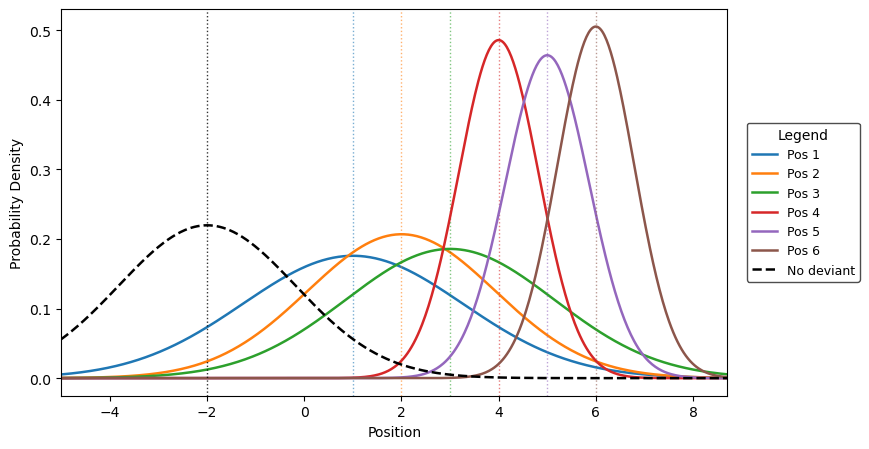

In [3]:
pos_sigma_ = np.array([ 0.4855639, 0.3233900 , 0.4310112 , -0.530650 , -0.484837 , -0.569888 , 0.2630443])
freq_sigma_ = np.array([ 0.6174512 , 0.7843596 , -0.664079 , -0.418226 ])

pos_sigma_ -= pos_sigma_.mean()
freq_sigma_ -= freq_sigma_.mean()


sigma_matrix_ = sigma_matrix(pos_sigma_, freq_sigma_)

plot_normals_by_position_averaged(means, sigma_matrix_,  xlim=(-5, 8.7), savepath='unbiased_exponential_sensory_noise.svg'
)

C:\Users\Fatbu\AppData\Local\Temp\ipykernel_28652\433959181.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10")  # distinct colors


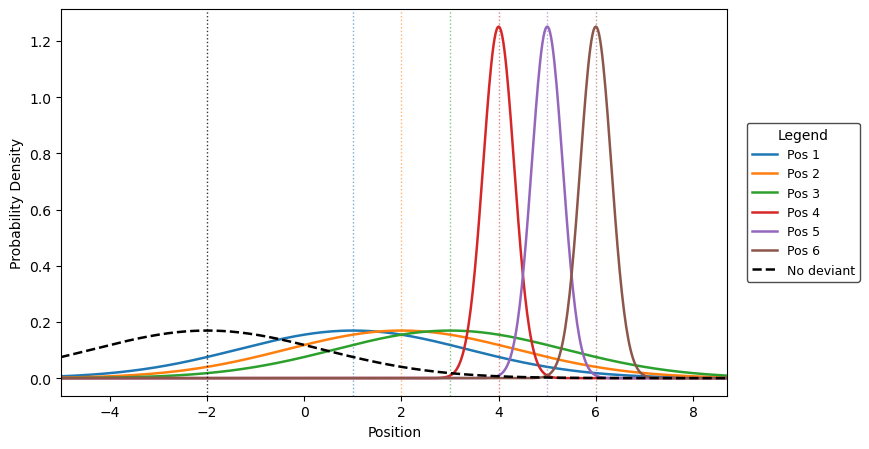

In [4]:
pos_sigma_ = np.array([1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0])
freq_sigma_ = np.array([-1.0, -1.0, -1.0, -1.0 ])

pos_sigma_ -= pos_sigma_.mean()
freq_sigma_ -= freq_sigma_.mean()


sigma_matrix_ = sigma_matrix(pos_sigma_, freq_sigma_)

plot_normals_by_position_averaged(means, sigma_matrix_,  xlim=(-5, 8.7), savepath='biased_exponential_sensory_noise.svg'
)

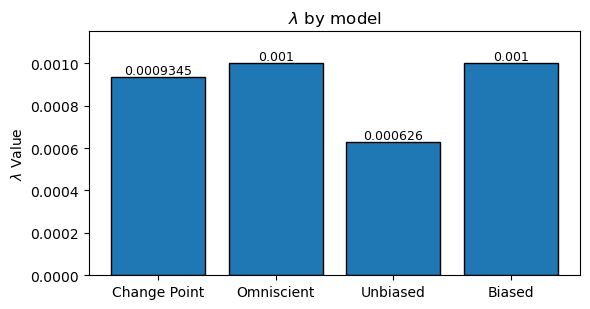

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.ticker import ScalarFormatter  # optional (see below)

lamdhas = np.array([0.0009345, 0.001, 0.0006260, 0.001])
labels  = ["Change Point", "Omniscient", "Unbiased", "Biased"]

fig, ax = plt.subplots(figsize=(6, 3.2))
ax.bar(labels, lamdhas, edgecolor="black")

ax.set_ylim(0, lamdhas.max()*1.15)
for i, v in enumerate(lamdhas):
    ax.text(i, v, f"{v:.4g}", ha="center", va="bottom", fontsize=9)


ax.set_ylabel(r"$\lambda$ Value")
ax.set_title(r"$\lambda$ by model")

plt.tight_layout()
plt.savefig("lambda_by_model.svg", format="svg", bbox_inches="tight")
plt.show()


C:\Users\Fatbu\AppData\Local\Temp\ipykernel_28652\3612415834.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('RdYlGn_r')   # reversed so low→green, high→red


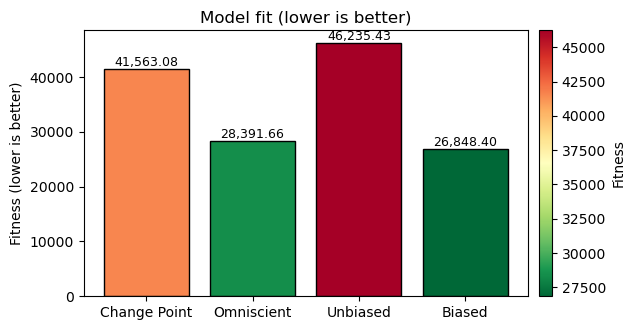

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fitness = np.array([41563.08, 28391.66, 46235.43, 26848.40])
labels  = ["Change Point", "Omniscient", "Unbiased", "Biased"]

fig, ax = plt.subplots(figsize=(6.5, 3.4))

# Map lower (better) → green, higher (worse) → red
norm = plt.Normalize(vmin=fitness.min(), vmax=fitness.max())
cmap = plt.cm.get_cmap('RdYlGn_r')   # reversed so low→green, high→red
colors = cmap(norm(fitness))

bars = ax.bar(labels, fitness, color=colors, edgecolor="black")

# Value labels
for i, v in enumerate(fitness):
    ax.text(i, v, f"{v:,.2f}", ha="center", va="bottom", fontsize=9)

ax.set_ylabel("Fitness (lower is better)")
ax.set_title("Model fit (lower is better)")

# Optional colorbar as a legend for the gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label("Fitness")

plt.tight_layout()
plt.savefig("fitness_by_model.svg", format="svg", bbox_inches="tight")
plt.show()
